In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('churn_ibm.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
y = df['Churn']
X = df.drop(['Churn', 'customerID'],axis=1)

In [5]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

In [6]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [7]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [10]:
for column in X.columns:
    if X[column].dtype == np.object:
        print('Converting: ', column)
        X = pd.concat([X,pd.get_dummies(X[column], prefix=column, drop_first=True)],axis=1).drop([column],axis=1)

Converting:  gender
Converting:  Partner
Converting:  Dependents
Converting:  PhoneService
Converting:  MultipleLines
Converting:  InternetService
Converting:  OnlineSecurity
Converting:  OnlineBackup
Converting:  DeviceProtection
Converting:  TechSupport
Converting:  StreamingTV
Converting:  StreamingMovies
Converting:  Contract
Converting:  PaperlessBilling
Converting:  PaymentMethod


In [11]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [12]:
y = pd.get_dummies(y, prefix='Churn', drop_first=True)
y.head()

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

prediction = decision_tree.predict(X_test)
prediction_proba = decision_tree.predict_proba(X_test)
print(prediction_proba)
print(prediction_proba[:,1])

print('Accuracy: ', accuracy_score(y_test, prediction))
print('AUC: ', roc_auc_score(y_test, prediction_proba[:,1]))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
[0. 0. 0. ... 0. 1. 0.]
Accuracy:  0.7203791469194313
AUC:  0.6468752580440947


In [19]:
decision_tree.tree_.node_count

1929

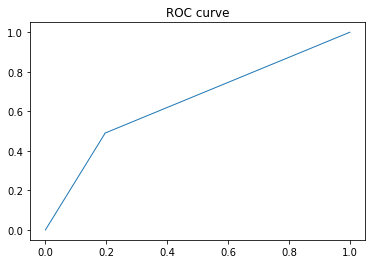

In [21]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, prediction_proba[:,1])
plt.plot(fpr, tpr, lw=1, alpha=1, label='ROC')
plt.title('ROC curve')
plt.show()

In [23]:
dt2 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, criterion='entropy')
dt2.fit(X_train, y_train)
prediction = dt2.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, prediction))
print('AUC: ', roc_auc_score(y_test, prediction))
print('Number of nodes: ', dt2.tree_.node_count)

Accuracy:  0.7672985781990521
AUC:  0.7201345499252246
Number of nodes:  15


[Text(1860.0, 1057.0, 'Contract_Two year <= 0.5\nentropy = 0.834\nsamples = 4922\nvalue = [3617, 1305]'),
 Text(930.0, 755.0, 'Contract_One year <= 0.5\nentropy = 0.925\nsamples = 3732\nvalue = [2464, 1268]'),
 Text(465.0, 453.0, 'InternetService_Fiber optic <= 0.5\nentropy = 0.982\nsamples = 2738\nvalue = [1584, 1154]'),
 Text(232.5, 151.0, 'entropy = 0.85\nsamples = 1235\nvalue = [894, 341]'),
 Text(697.5, 151.0, 'entropy = 0.995\nsamples = 1503\nvalue = [690, 813]'),
 Text(1395.0, 453.0, 'StreamingMovies_Yes <= 0.5\nentropy = 0.514\nsamples = 994\nvalue = [880, 114]'),
 Text(1162.5, 151.0, 'entropy = 0.274\nsamples = 551\nvalue = [525, 26]'),
 Text(1627.5, 151.0, 'entropy = 0.719\nsamples = 443\nvalue = [355, 88]'),
 Text(2790.0, 755.0, 'MonthlyCharges <= 93.5\nentropy = 0.2\nsamples = 1190\nvalue = [1153, 37]'),
 Text(2325.0, 453.0, 'PaymentMethod_Electronic check <= 0.5\nentropy = 0.114\nsamples = 921\nvalue = [907, 14]'),
 Text(2092.5, 151.0, 'entropy = 0.091\nsamples = 866\nvalu

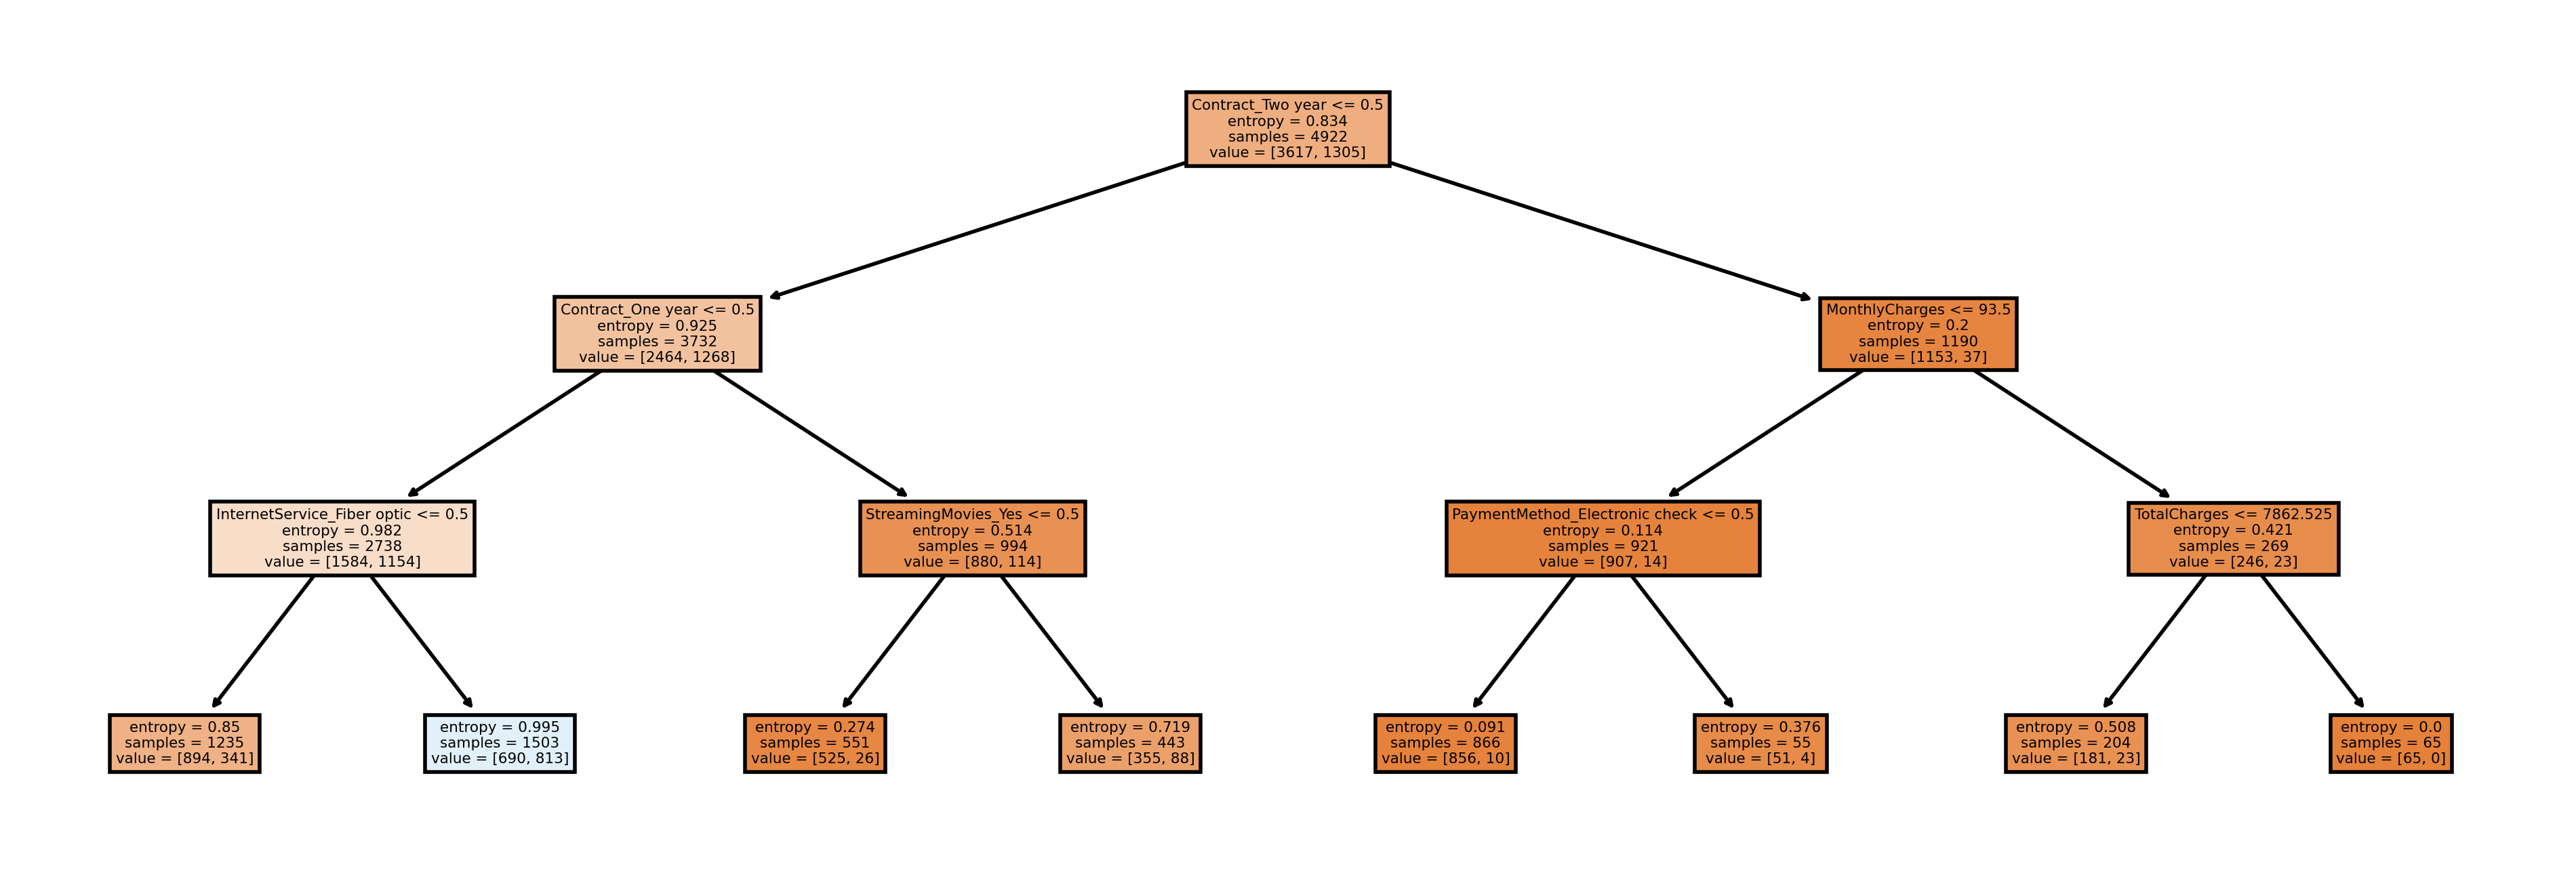

In [28]:
from sklearn import tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi=400)
tree.plot_tree(dt2, feature_names=X.columns, filled=True)

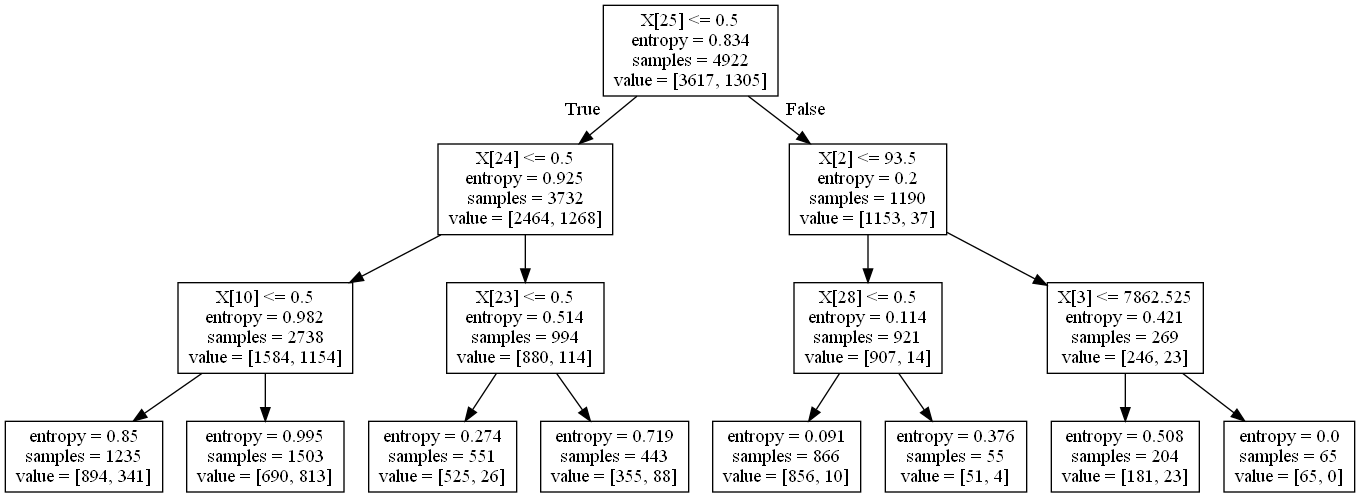

In [30]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

dot_data = StringIO()

export_graphviz(dt2, out_file=dot_data)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())